In [64]:
import mne 
import os
import numpy as np

In [47]:
def eegPath(path):
    folderPath = os.listdir(path)
    fifFilePath = ""
    #print(folder)
    for file in folderPath:
        if '.fif' in file:
            fifFilePath  = os.path.join(path, file)
    print(fifFilePath)       

In [48]:
path = "/Users/tarekulislam/Desktop/seniorprojecteeg/Tarekul_Workspace/capstone2"

In [49]:
fif_file = eegPath(path)

/Users/tarekulislam/Desktop/seniorprojecteeg/Tarekul_Workspace/capstone2/20140306_1133-epo.fif


In [50]:
mne.read_epochs(fif_file,preload=True)

AttributeError: 'NoneType' object has no attribute 'endswith'

In [52]:
epoch = mne.read_epochs("/Users/tarekulislam/Desktop/seniorprojecteeg/Tarekul_Workspace/capstone2/20140306_1133-epo.fif",preload=True)

Reading /Users/tarekulislam/Desktop/seniorprojecteeg/Tarekul_Workspace/capstone2/20140306_1133-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    1949.22 ms
        0 CTF compensation matrices available
984 matching events found
Applying baseline correction (mode: mean)
984 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [54]:
epoch.ch_names

['Lm',
 'LE1',
 'Nasium',
 'LE3',
 'LD2',
 'LD5',
 'LC3',
 'LC6',
 'LB1',
 'LB4',
 'LA2',
 'LA5',
 'LL1',
 'LL4',
 'LL7',
 'LL10',
 'LL13',
 'L3',
 'L6',
 'L9',
 'L12',
 'Z1',
 'Z4',
 'Z7',
 'Z10',
 'Z13',
 'R3',
 'R6',
 'R9',
 'R12',
 'RR1',
 'RR4',
 'RR7',
 'RR10',
 'RR13',
 'RA2',
 'RA5',
 'RB1',
 'RB4',
 'RC3',
 'RC6',
 'RD2',
 'RD5',
 'RE1',
 'VEOG',
 'RE3',
 'Rm',
 'RE4',
 'RD1',
 'RD3',
 'RD4',
 'RD6',
 'RD7',
 'RC1',
 'RC2',
 'RC4',
 'RC5',
 'RC7',
 'RB2',
 'RB3',
 'RB5',
 'RB6',
 'RA1',
 'RA3',
 'RA4',
 'RR2',
 'RR3',
 'RR5',
 'RR6',
 'RR8',
 'RR9',
 'RR11',
 'RR12',
 'R1',
 'R2',
 'R4',
 'R5',
 'R7',
 'R8',
 'R10',
 'R11',
 'R13',
 'R14',
 'Z2',
 'Z3',
 'Z5',
 'Z6',
 'Z8',
 'Z9',
 'Z11',
 'Z12',
 'Z14',
 'L1',
 'L2',
 'L4',
 'L5',
 'L7',
 'L8',
 'L10',
 'L11',
 'L13',
 'L14',
 'LL2',
 'LL3',
 'LL5',
 'LL6',
 'LL8',
 'LL9',
 'LL11',
 'LL12',
 'LA1',
 'LA3',
 'LA4',
 'LB2',
 'LB3',
 'LB5',
 'LB6',
 'LC1',
 'LC2',
 'LC4',
 'LC5',
 'LC7',
 'LD1',
 'LD3',
 'LD4',
 'LD6',
 'LD7',
 

In [57]:
epoch.get_data().shape

(984, 129, 500)

In [166]:
#epoch = epoch.drop_channels(['Lm', 'Rm' ,'VEOG','STI 014'])
epoch = epoch.drop_channels(['STI 014'])

In [167]:
epoch.get_data().shape

(984, 125, 500)

In [168]:
"""
understanding variance and get ch 2 as outside boundaries of std deviation
"""
arr =  [[124,125,126,127],  #ch 1
        [123,2,124,125],    #ch 2
        [127,125,121,123],  #ch 3
        [123,124,-5,126],  #ch 4
        [122,127,123,125]]  #ch 5

arr1 = np.array(arr)
arr1.shape
#print(arr1)
import math
sum = 0
a = np.sum(arr1[0])
b = np.sum(arr[1])
c = np.sum(arr[2]) 
d = np.sum(arr[3])
e = np.sum(arr[4]) 
print("ch 1 is ",a)
print("ch 2 is ",b)
print("ch 3 is ",c)
print("ch 4 is ",d)
print("ch 5 is ",e)

mean = (a+b+c+d+e)/5
print("mean is, ",mean)
print("np mean is ",np.mean(arr1))
variance = (((mean - a)**2) + ((mean - b)**2) + ((mean - c)**2)+ \
                                                ((mean - d)**2) + \
                                                ((mean - e)**2)) / 5
print("variance =",variance)

std = math.sqrt(variance)
print(std)

normal = mean + std 
normal2 = mean - std

print(normal)
print(normal2)

ch 1 is  502
ch 2 is  374
ch 3 is  496
ch 4 is  368
ch 5 is  497
mean is,  447.4
np mean is  111.85
variance = 3899.04
62.44229335954918
509.84229335954916
384.9577066404508


In [169]:
"""
understanding variance and get ch 2 as outside boundaries of std deviation
"""
arr2 =  [[124,125,126,127],  #ch 1
        [123,127,124,125],    #ch 2
        [127,125,121,123],  #ch 3
        [123,124,122,126],  #ch 4
        [122,127,123,125]]  #ch 5

arr2 = np.array(arr2)
arr2.shape
#print(arr1)
import math
sum = 0
a = np.sum(arr2[0])
b = np.sum(arr2[1])
c = np.sum(arr2[2]) 
d = np.sum(arr2[3])
e = np.sum(arr2[4]) 
print("ch 1 is ",a)
print("ch 2 is ",b)
print("ch 3 is ",c)
print("ch 4 is ",d)
print("ch 5 is ",e)

mean = (a+b+c+d+e)/5
print("mean is, ",mean)
print("np mean is ",np.mean(arr1))
variance = (((mean - a)**2) + ((mean - b)**2) + ((mean - c)**2)+ \
                                                ((mean - d)**2) + \
                                                ((mean - e)**2)) / 5
print("variance =",variance)

std = math.sqrt(variance)
print(std)

normal = mean + std 
normal2 = mean - std

print(normal)
print(normal2)

ch 1 is  502
ch 2 is  499
ch 3 is  496
ch 4 is  495
ch 5 is  497
mean is,  497.8
np mean is  111.85
variance = 6.16
2.4819347291981715
500.28193472919816
495.31806527080187


In [348]:
"""
understanding variance and get ch 2 as outside boundaries of std deviation
"""
arr3 =  [[0.5,-0.2,0.3,-0.3],  #ch 1
        [0.4,-0.2,0.4,-0.1],  #ch 2
        [0.2,-0.5,0.3,-0.4],  #ch 3
        [0.1,-0.2,1.1,-0.9],  #ch 4
        [0.4,-0.2,0.4,-0.1]]  #ch 5

arr3 = np.array(arr3)

#print(arr1)
import math
hold = []
hold.append(np.sum(arr3[0]))
f = np.sum(arr3[0])
hold.append(np.sum(arr3[1]))
g = np.sum(arr3[1])
hold.append(np.sum(arr3[2]))
h = np.sum(arr3[2]) 
hold.append(np.sum(arr3[3]))
i = np.sum(arr3[3])
hold.append(np.sum(arr3[4]))
j = np.sum(arr3[4]) 
print("ch 1 is ",f)
print("ch 2 is ",g)
print("ch 3 is ",h)
print("ch 4 is ",i)
print("ch 5 is ",j)

mean2 = np.mean(arr3)
print("mean is, ",mean2)

v=0
for k in arr3:
    for m in k:
        v += (mean2 - m)**2
v = v/20
print("variance =",v)

std = math.sqrt(v)
print("standard deviation", std)

normale = math.ceil(mean2 + std)
normal2e = math.floor(mean2- std)

print("normal std:" ,normale)
print("normal std 2:",normal2e)
print("")
for i in arr3:
    for p in i:
        if p > normale or p < normal2e:
            print(p)
            
#print(np.array(arr3).shape[0] * np.array(arr3).shape[1])            

ch 1 is  0.3
ch 2 is  0.5000000000000001
ch 3 is  -0.4
ch 4 is  0.09999999999999998
ch 5 is  0.5000000000000001
mean is,  0.05
variance = 0.18850000000000003
standard deviation 0.4341658669218482
normal std: 1
normal std 2: -1

1.1


In [417]:
import matplotlib.pyplot as plt
x = np.arange(0,20,1)
y = [0.5,-0.2,0.3,-0.3,0.4,-0.2,0.4,-0.1,0.2,-0.5,0.3,-0.4,0.1,-0.2,1.1,-0.9,0.4,-0.2,0.4,-0.1]
plt.plot(x,y)

In [407]:
def getVar(epo_data,segmentStartPoint):
    ChannelsSegmentData = [] #125 x 49
    for channel in epo_data[0]:
        temp = []
        for i in range(segmentStartPoint,50+segmentStartPoint):
            #print(i)
            temp.append(channel[i])
        ChannelsSegmentData.append(temp)   
    

    
    mean = np.mean(ChannelsSegmentData)
    
    v = 0
    for k in ChannelsSegmentData:
        for n in k:
            v += (mean - n)**2
    
    variance = v / 6249
    print("variance is ", variance)
    std = math.sqrt(variance)
    
    print("mean is ",mean)
    print("std is ",std)
    normal1 = mean + std 
    normal2 = mean - std
    
    #print(variance)
    #print(std)
    print(normal1)
    print(normal2)
    
    print("")
    
    fff = []
    for r in ChannelsSegmentData:
        for s in r:
            if s > normal1 or s< normal2:
                fff.append(s)
    
    print(np.array(fff).shape)
    oo = np.array(fff).shape[0]
    print(125 * 50)
    
    
    

In [422]:
data = epoch.get_data()
getVar(data,250)

variance is  8.685048367661207e-11
mean is  1.446281652678568e-07
std is  9.319360690337727e-06
9.463988855605583e-06
-9.17473252506987e-06

(1877,)
6250


(125,)


In [218]:
np.mean(newArr)

6.359518785760496e-06

6.359518785760496e-06

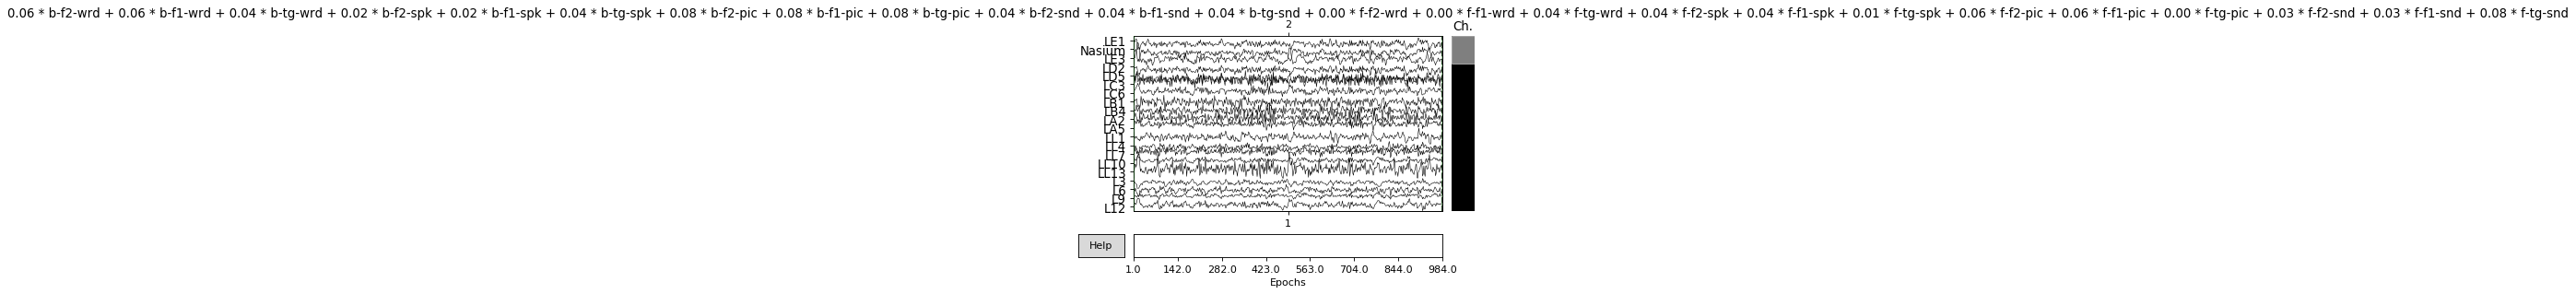

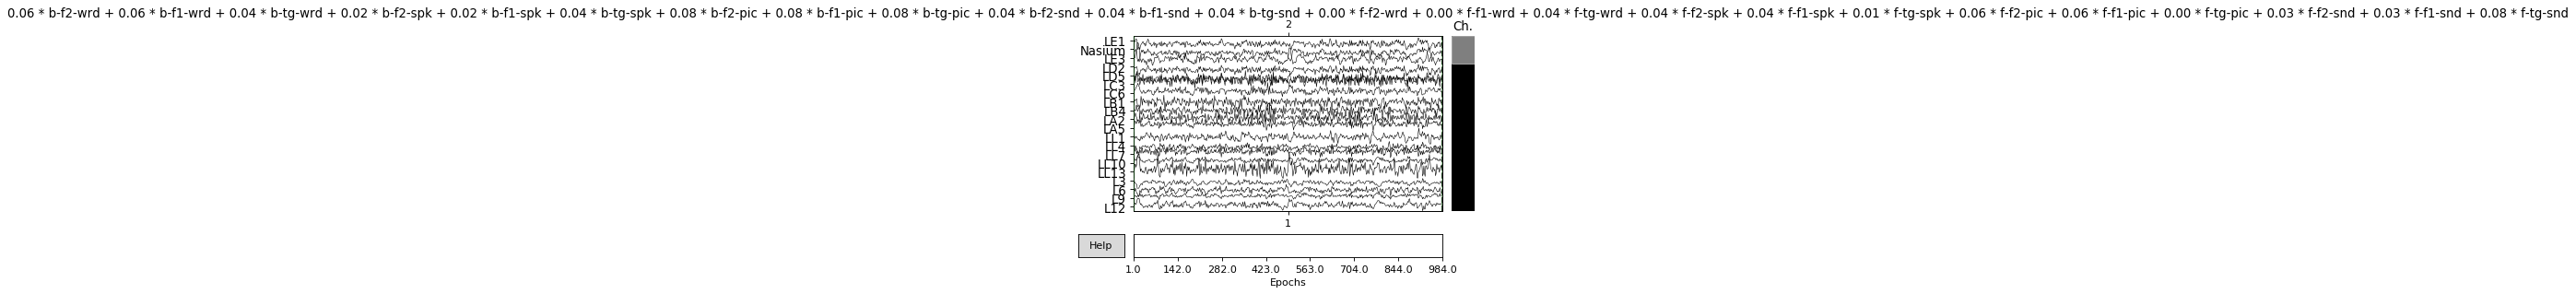

In [427]:
mne.viz.plot_epochs(epoch,n_epochs=1)